In [ ]:
# ipython magic

# %reset -f
# %matplotlib notebook
# %load_ext autoreload
# %autoreload 2

In [1]:
import os
import time
import sys
sys.path.append('..')
sys.path.append(r'C:\Users\Robert Lees\Documents\Code\Vape\rob_suite2p')
# sys.path.append(r'C:\Users\Robert Lees\Documents\Code\suite2p')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import utils.interareal_combined_class as iac
import pickle
import tifffile as tf
from scipy import spatial, stats

['C:\\ProgramData\\Anaconda3\\lib\\site-packages\\suite2p']


2019-06-11_J048
Fetching paths and stim types for: 2019-06-11_J048
Umbrella folder: Q:\Data\2019-06-11
Experimental info = (array(['Q:\\Data\\2019-06-11\\J048\\2019-06-11_J048_t-005',
       'Q:\\Data\\2019-06-11\\J048\\2019-06-11_J048_NAPARM\\2019-06-11_J048_NAPARM_002',
       'Q:\\Data\\2019-06-11\\J048\\2019-06-11_J048_t-005.paq'],
      dtype='<U73'), array(['Q:\\Data\\2019-06-11\\J048\\2019-06-11_J048_t-006',
       'Q:\\Data\\2019-06-11\\J048\\2019-06-11_J048_NAPARM\\2019-06-11_J048_NAPARM_006',
       'Q:\\Data\\2019-06-11\\J048\\2019-06-11_J048_t-006.paq'],
      dtype='<U73'), array([], dtype='<U73'), array([], dtype='<U73'))

Obtaining metadata for: Q:\Data\2019-06-11\J048\2019-06-11_J048_t-005
n planes: 1 
n frames: 57007 
fps: 36.77851269827802 
frame size (px): 878 x 414 
zoom: 0.8316588768 
pixel size (um): 1.31338993281181 1.31338993281181 
scan centre (V): 0.44746344278349 0.10002919510337

NAPARM xml: Q:\Data\2019-06-11\J048\2019-06-11_J048_NAPARM\2019-06-11_J048_NAPA

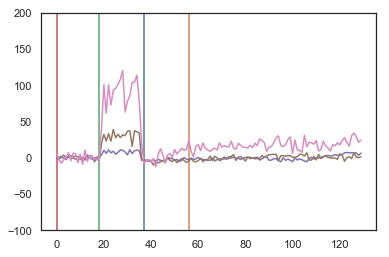

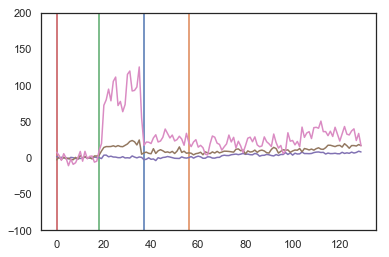

In [2]:
ss_id = '1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY'
sheet_names = ['2019-06-11_J048'
#                '2019-06-13_J052',
#                '2019-06-25_RL048',
#                '2019-07-15_RL052',
#                '2019-08-14_J058',
#                '2019-08-14_J059',
#                '2019-08-15_RL055',
#                '2019-11-14_J063',
#                '2019-11-15_J064',
#                '2019-11-18_J065'
              ]
qnap_path = r'Q:\Data'
pkl_folder = r'Q:\pkl_files'

for sheet_name in sheet_names:
    print(sheet_name)
    exp_obj = iac.experimentInfo(ss_id, sheet_name, qnap_path)
    
    exp_obj.getFrameRanges()
    
    exp_obj.photostim_r.s2pProcessing()
    exp_obj.photostim_s.s2pProcessing()
    exp_obj.whisker_stim.s2pProcessing()
    exp_obj.spont.s2pProcessing()
    
    #     exp_obj.s2pRun()
    
    pkl_path = os.path.join(pkl_folder, sheet_name + '.pkl')
    
    with open(pkl_path, 'wb') as f:
        pickle.dump(exp_obj, f)

In [4]:
pkl_folder = r'Q:\pkl_files'
s2_border = 500

master_obj = iac.interarealPlotting(pkl_folder)

master_path = r'Q:\master_pkl\master_obj.pkl'

with open(master_path, 'wb') as f:
    pickle.dump(master_obj, f)

In [6]:
master_obj.df

,sheet_name,stim_type,n_units,n_targets,n_targeted_cells,stim_dur,stim_freq,non_target_sta,non_target_sta_amp,non_target_sta_std,target_sta,target_sta_amp,target_sta_std
0,2019-06-11_J048,pr,1158,50,91,445.0,34.482759,"[3.778207590789423, 6.347343457549863, 10.0643...",6.26109,"[149.18783537073054, 115.1301149593675, 322.29...","[1.4618132136919095, -0.22807782423330866, -1....",64.946827,"[8.062350058678245, 7.595533700249034, 13.8349..."
1,2019-06-11_J048,ps,1158,23,61,445.0,34.482759,"[15.779615862097327, -4.26059482068582, -20.95...",8.41053,"[380.46172722529906, 229.7786406354535, 482.79...","[-1.1637716462845018, -0.3404350506032523, 0.4...",38.154741,"[5.278897953074221, 4.883519868216406, 5.11950..."


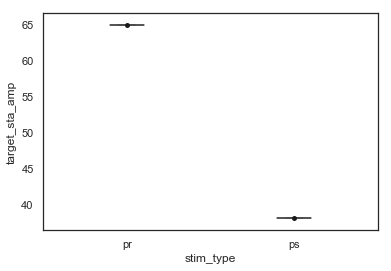

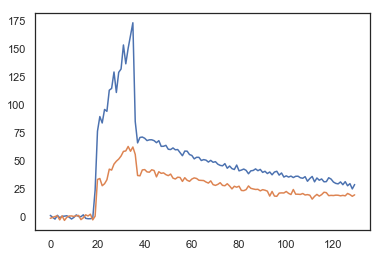

In [13]:
master_obj.plotSummaryStat('target_sta_amp')
plt.figure()
master_obj.plotSTA('target_sta')

2019-06-11_J048
   n_units  n_targets  n_targeted_cells  stim_dur  stim_freq stim_type
0     1158         50                91     445.0  34.482759        pr
1     1158         23                61     445.0  34.482759        ps


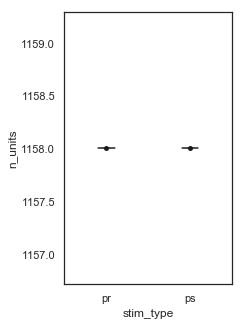

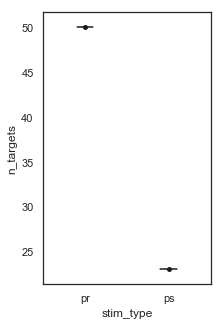

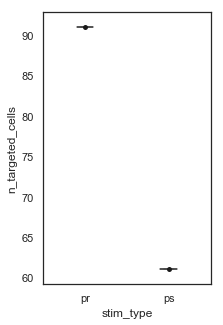

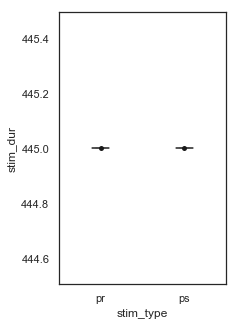

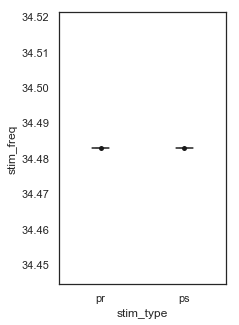

In [6]:
#get some basic summary stats from the datasets - TRANSFERRED TO MASTER CLASS

pkl_folder = r'Q:\pkl_files'

n_units = []
n_targets = []
n_targeted_cells = []
stim_dur = []
stim_freq = []
stim_types = []

for file in os.listdir(pkl_folder):
    if '.pkl' in file:
        pkl_path = os.path.join(pkl_folder, file)
        
        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        #make function from here down
        print(exp_obj.sheet_name)
        
        stim_list = [exp_obj.photostim_r, exp_obj.photostim_s]

        if exp_obj.spont.n_frames > 0:
            stim_list.append(exp_obj.spont)
        
        for sub_obj in stim_list:
            stim_types.append(sub_obj.stim_type)
            n_units.append(sub_obj.n_units[0])
            n_targets.append(sub_obj.n_targets)
            n_targeted_cells.append(len([i for i in sub_obj.targeted_cells if i==1]))
            stim_dur.append(sub_obj.stim_dur)
            stim_freq.append( ( 1 / ( ( (sub_obj.single_stim_dur*sub_obj.n_shots) * sub_obj.n_groups-1 ) + ( sub_obj.inter_point_delay * sub_obj.n_groups ) ) ) *1000 )

#store and plot basic stats of datasets

df = pd.DataFrame(data=list(zip(n_units, n_targets, n_targeted_cells, stim_dur, stim_freq, stim_types)), columns=['n_units', 'n_targets', 'n_targeted_cells', 'stim_dur', 'stim_freq', 'stim_type'])
print(df)

for column in df.columns[:-1]:
    plt.figure(figsize=(3,5))
    sns.boxplot(x='stim_type', y=column, data=df, width=0.2)
    sns.swarmplot(x='stim_type', y=column, data=df, color='k', size=5)

Q:\pkl_files\2019-06-11_J048.pkl
Q:\Data\2019-06-11\J048\2019-06-11_J048_t-005
Q:\Data\2019-06-11\J048\2019-06-11_J048_t-006


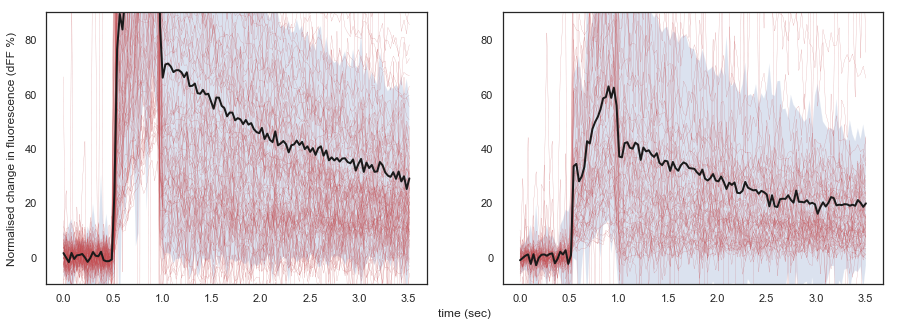

In [34]:
#make target STA traces - TRANSFERRED TO CLASS

mean_sta_amp = []

for file in os.listdir(pkl_folder):
    if '.pkl' in file:
        pkl_path = os.path.join(pkl_folder, file)
        print(pkl_path)
            
        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        stim_list = [exp_obj.photostim_r, exp_obj.photostim_s]

        if exp_obj.spont.n_frames > 0:
            stim_list.append(exp_obj.spont)
        
        fig, ax = plt.subplots(nrows=1, ncols=len(stim_list), figsize=(15,5))
        
        for i,sub_obj in enumerate(stim_list):
            print(sub_obj.tiff_path)
            sta_amp = []
            targeted_sta = []
            
            for cell,_ in enumerate(sub_obj.targeted_cells):
                if sub_obj.targeted_cells[cell]==1:
                    targeted_sta.append(sub_obj.stas[0][cell])
                    sta_amp.append(sub_obj.sta_amplitudes[0][cell])

            mean_sta = np.nanmean(targeted_sta,axis=0)
            mean_sta_amp.append(np.nanmean(sta_amp,axis=0))
            
            std = np.std(targeted_sta, axis=0)

            for sta,_ in enumerate(targeted_sta):
                a = range(0,len(targeted_sta[sta]))
                b = [x/sub_obj.fps for x in a]
                ax[i].plot(b, targeted_sta[sta], 'r--', lw=0.2);
                ax[i].set_ylim((-10,90))
            ax[i].fill_between(b, mean_sta-std, mean_sta+std, alpha = 0.2) 
            ax[i].plot(b, mean_sta, 'k', lw=2);

#add labels to entire plot
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('time (sec)');
plt.ylabel('Normalised change in fluorescence (dFF %)');

   n_units  n_targets  n_targeted_cells  stim_dur  stim_freq stim_type  \
0     1158         50                91     445.0  34.482759        pr   
1     1158         23                61     445.0  34.482759        ps   

   target_sta_amp  
0       64.946827  
1       38.154741  


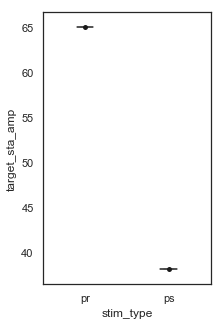

In [8]:
df['target_sta_amp'] = mean_sta_amp
print(df)

plt.figure(figsize=(3,5))
sns.boxplot(x='stim_type', y='target_sta_amp', data=df, width=0.2)
sns.swarmplot(x='stim_type', y='target_sta_amp', data=df, color='k', size=5)

In [ ]:
#make follower STA traces

mean_sta_amp_neg = []
mean_sta_amp_pos = []

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        print(pkl_path)
        
        if any(s in pkl_path for s in ['random', 'sensory']):
#         if 'spont_sham' in pkl_path:
            
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)
            
            follower_sta_positive = []
            sta_amp_pos = []
            follower_sta_negative = []
            sta_amp_neg = []
            
            for cell,_ in enumerate(exp_obj.targeted_cells):
                if exp_obj.targeted_cells[cell]==0 and exp_obj.sta_amplitudes[0][cell] > 0 and cell in exp_obj.sta_sig_nomulti[0]:
#                 if exp_obj.targeted_cells[cell]==0 and exp_obj.sta_amplitudes[0][cell] > 0:
                    follower_sta_positive.append(exp_obj.stas[0][cell])
                    sta_amp_pos.append(exp_obj.sta_amplitudes[0][cell])
            
                if exp_obj.targeted_cells[cell]==0 and exp_obj.sta_amplitudes[0][cell] < 0 and cell in exp_obj.sta_sig_nomulti[0]:
#                 if exp_obj.targeted_cells[cell]==0 and exp_obj.sta_amplitudes[0][cell] < 0:
                    follower_sta_negative.append(exp_obj.stas[0][cell])
                    sta_amp_neg.append(exp_obj.sta_amplitudes[0][cell])
                    
            if np.shape(follower_sta_positive)[0] > 0:
                mean_sta = np.mean(follower_sta_positive,axis=0)
                mean_sta_amp_pos.append(np.nanmean(sta_amp_pos))
                 
                plt.figure(figsize=(10,5));
                ax1 = plt.subplot(121)
                ax2 = plt.subplot(122)

                for sta,_ in enumerate(follower_sta_positive):
                    a = range(0,len(follower_sta_positive[sta]))
                    b = [x/exp_obj.fps for x in a]
                    ax1.plot(b, follower_sta_positive[sta], 'r--', lw=0.2);
                    ax1.set_ylim((-10, 20))
                ax1.plot(b, mean_sta, 'k', lw=2);
                plt.xlabel('time (sec)')
                plt.ylabel('Normalised change in fluorescence (dFF %)')
            
            if np.shape(follower_sta_negative)[0] > 0:
                mean_sta = np.mean(follower_sta_negative,axis=0)
                mean_sta_amp_neg.append(np.nanmean(sta_amp_neg))

                for sta,_ in enumerate(follower_sta_negative):
                    a = range(0,len(follower_sta_negative[sta]))
                    b = [x/exp_obj.fps for x in a]
                    ax2.plot(b, follower_sta_negative[sta], 'b--', lw=0.2);
                    ax2.set_ylim((-10, 20))
                ax2.plot(b, mean_sta, 'k', lw=2);
                plt.xlabel('time (sec)')
                plt.ylabel('Normalised change in fluorescence (dFF %)')

In [ ]:
# plot sham 'follower' response amplitudes

plt.figure(figsize=(3,5))
sns.boxplot(data=mean_sta_amp_neg, width=0.2)
sns.swarmplot(data=mean_sta_amp_neg, color='k', size=5)
plt.ylim(-2.75, 0)

plt.figure(figsize=(3,5))
sns.boxplot(data=mean_sta_amp_pos, width=0.2)
sns.swarmplot(data=mean_sta_amp_pos, color='k', size=5)
plt.ylim(0, 12)

In [ ]:
df['follower_sta_amp_+ve'] = mean_sta_amp_pos
df['follower_sta_amp_-ve'] = mean_sta_amp_neg
print(df)

plt.figure(figsize=(3,5))
sns.boxplot(x='target_groups', y='follower_sta_amp_+ve', data=df, width=0.2)
sns.swarmplot(x='target_groups', y='follower_sta_amp_+ve', data=df, color='k', size=5)
plt.ylim(0, 12)

plt.figure(figsize=(3,5))
sns.boxplot(x='target_groups', y='follower_sta_amp_-ve', data=df, width=0.2)
sns.swarmplot(x='target_groups', y='follower_sta_amp_-ve', data=df, color='k', size=5)
plt.ylim(-2.75, 0)

In [ ]:
# number of cells excited in s1 and s2

pkl_folder = r'P:\rlees\pkl_files'

plt.figure(figsize=(10,15))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
# ax3 = plt.subplot(323)
# ax4 = plt.subplot(324)
# ax5 = plt.subplot(325)
# ax6 = plt.subplot(326)

rand_ratio_s1_s2 = []
sensory_ratio_s1_s2 = []
all_trial_s1_sensory = []
all_trial_s2_sensory = []
all_trial_s1_random = []
all_trial_s2_random = []

for root, dirs, files in os.walk(pkl_folder):
    for pkl_file in files:
        pkl_path = os.path.join(pkl_folder, pkl_file)
        print(pkl_path)
        
        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        trial_s1_count = []
        trial_s2_count = []
        
        if 'spont' not in pkl_file:
#         if any(s in pkl_file for s in ['RL055_exp1', 'J059_exp1']):
            
            for trial in range(exp_obj.n_trials):

                s1_count = 0
                s2_count = 0

                for cell,_ in enumerate(exp_obj.cell_id[0]):

    #                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] < 400:
                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] < s2_border:
                        s1_count += 1
    #                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] > 450:
                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] > s2_border:
                        s2_count += 1

                trial_s1_count.append(s1_count)
                trial_s2_count.append(s2_count)

            if 'random' in pkl_file:
#             if 'RL055' in pkl_file:
                ax1.scatter(trial_s1_count, trial_s2_count, label=exp_obj.sheet_name, alpha=0.4)
#                 ax3.hist(trial_s1_count, histtype='step')
#                 ax5.hist(trial_s2_count, histtype='step')
                try:
                    rand_ratio_s1_s2.append([s2_count/(s1_count+0.01) for s1_count,s2_count in zip(trial_s1_count, trial_s2_count)])
                except:
                    print('Error in ratio calculation.')
                all_trial_s1_random.append(trial_s1_count)
                all_trial_s2_random.append(trial_s2_count)
                
            if 'sensory' in pkl_file:
#             if 'J059' in pkl_file:
                ax2.scatter(trial_s1_count, trial_s2_count, label=exp_obj.sheet_name, alpha=0.4)
#                 ax4.hist(trial_s1_count, histtype='step')
#                 ax6.hist(trial_s2_count, histtype='step')
                try:
                    sensory_ratio_s1_s2.append([s2_count/(s1_count+0.01) for s1_count,s2_count in zip(trial_s1_count, trial_s2_count)])
                except:
                    print('Error in ratio calculation.')
                    
                all_trial_s1_sensory.append(trial_s1_count)
                all_trial_s2_sensory.append(trial_s2_count)
        
    rand_ratio_s1_s2 = [item for sublist in rand_ratio_s1_s2 for item in sublist]
    sensory_ratio_s1_s2 = [item for sublist in sensory_ratio_s1_s2 for item in sublist]

ax1.set_ylim((-5,200))
ax2.set_ylim((-5,200))
ax1.set_xlim((0,200))
ax2.set_xlim((0,200))
# ax3.set_xlim((0,200))
# ax4.set_xlim((0,200))
# ax5.set_xlim((0,200))
# ax6.set_xlim((0,200))
# ax3.set_xlim((0,100))
# ax4.set_xlim((0,100))
# ax5.set_xlim((0,100))
# ax6.set_xlim((0,100))
ax1.set_aspect('equal');
ax2.set_aspect('equal');

ax1.set_xlabel('Number of S1 cells excited')
ax2.set_xlabel('Number of S1 cells excited')
ax1.set_ylabel('Number of S2 cells excited')
ax2.set_ylabel('Number of S2 cells excited')

plt.figure(figsize=(5,10));
plt.boxplot([rand_ratio_s1_s2,sensory_ratio_s1_s2]);
plt.ylabel('Ratio of excited S2 cells to excited S1 cells');
plt.ylim(-1,11);
stats.wilcoxon(rand_ratio_s1_s2, sensory_ratio_s1_s2)

In [14]:
pkl_path = r"Q:\pkl_files_old\2019-06-11_J048_exp0_random.pkl"

with open(pkl_path, 'rb') as f:
    exp_obj = pickle.load(f)

['C:\\ProgramData\\Anaconda3\\lib\\site-packages\\suite2p']


In [3]:
exp_obj.cell_s1

AttributeError: 'experimentInfo' object has no attribute 'cell_s1'

In [28]:
a = np.array(exp_obj.all_amplitudes[0])
b = exp_obj.single_sig[0]
shape = np.shape(b)
c = exp_obj.cell_med
d = a[b]
d

array([-17.5532097 ,  31.60004969,  24.32752543, ..., -30.59083646,
       -31.73866408, -25.66710525])

In [ ]:
trial_s1_count = []
trial_s2_count = []

for trial in range(exp_obj.n_trials):

    s1_count = 0
    s2_count = 0

    for cell,_ in enumerate(exp_obj.cell_id[0]):

#                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] < 400:
        if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] < s2_border:
            s1_count += 1
#                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] > 450:
        if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] > s2_border:
            s2_count += 1

    trial_s1_count.append(s1_count)
    trial_s2_count.append(s2_count)

if 'random' in pkl_file:
#             if 'RL055' in pkl_file:
    ax1.scatter(trial_s1_count, trial_s2_count, label=exp_obj.sheet_name, alpha=0.4)
#                 ax3.hist(trial_s1_count, histtype='step')
#                 ax5.hist(trial_s2_count, histtype='step')
    try:
        rand_ratio_s1_s2.append([s2_count/(s1_count+0.01) for s1_count,s2_count in zip(trial_s1_count, trial_s2_count)])
    except:
        print('Error in ratio calculation.')
    all_trial_s1_random.append(trial_s1_count)
    all_trial_s2_random.append(trial_s2_count)

if 'sensory' in pkl_file:
#             if 'J059' in pkl_file:
    ax2.scatter(trial_s1_count, trial_s2_count, label=exp_obj.sheet_name, alpha=0.4)
#                 ax4.hist(trial_s1_count, histtype='step')
#                 ax6.hist(trial_s2_count, histtype='step')
    try:
        sensory_ratio_s1_s2.append([s2_count/(s1_count+0.01) for s1_count,s2_count in zip(trial_s1_count, trial_s2_count)])
    except:
        print('Error in ratio calculation.')

    all_trial_s1_sensory.append(trial_s1_count)
    all_trial_s2_sensory.append(trial_s2_count)

rand_ratio_s1_s2 = [item for sublist in rand_ratio_s1_s2 for item in sublist]
sensory_ratio_s1_s2 = [item for sublist in sensory_ratio_s1_s2 for item in sublist]

ax1.set_ylim((-5,200))
ax2.set_ylim((-5,200))
ax1.set_xlim((0,200))
ax2.set_xlim((0,200))
# ax3.set_xlim((0,200))
# ax4.set_xlim((0,200))
# ax5.set_xlim((0,200))
# ax6.set_xlim((0,200))
# ax3.set_xlim((0,100))
# ax4.set_xlim((0,100))
# ax5.set_xlim((0,100))
# ax6.set_xlim((0,100))
ax1.set_aspect('equal');
ax2.set_aspect('equal');

ax1.set_xlabel('Number of S1 cells excited')
ax2.set_xlabel('Number of S1 cells excited')
ax1.set_ylabel('Number of S2 cells excited')
ax2.set_ylabel('Number of S2 cells excited')

plt.figure(figsize=(5,10));
plt.boxplot([rand_ratio_s1_s2,sensory_ratio_s1_s2]);
plt.ylabel('Ratio of excited S2 cells to excited S1 cells');
plt.ylim(-1,11);
stats.wilcoxon(rand_ratio_s1_s2, sensory_ratio_s1_s2)

In [ ]:
all_trial_s1_sensory = [cells for sublist in all_trial_s1_sensory for cells in sublist]
all_trial_s2_sensory = [cells for sublist in all_trial_s2_sensory for cells in sublist]

all_trial_s1_random = [cells for sublist in all_trial_s1_random for cells in sublist]
all_trial_s2_random = [cells for sublist in all_trial_s2_random for cells in sublist]

plt.figure(figsize=(10,15))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)

x=all_trial_s1_sensory
y=all_trial_s2_sensory

ax1.scatter(all_trial_s1_random, all_trial_s2_random, alpha=0.2)
z = np.polyfit(all_trial_s1_random, all_trial_s2_random, 1)
p = np.poly1d(z)
ax1.plot(all_trial_s1_random,p(all_trial_s1_random),'r')
slope, intercept, r_value, p_value, std_err = stats.linregress(all_trial_s1_random,all_trial_s2_random)
slope = np.around(slope, decimals=4)
r_value = np.around(r_value, decimals=2)
ax1.text(70, 100, 'Slope: ' + str(slope) + '\nr^2: ' + str(np.square(r_value)))

x=all_trial_s1_random
y=all_trial_s2_random

ax2.scatter(all_trial_s1_sensory, all_trial_s2_sensory, alpha=0.2)
z = np.polyfit(all_trial_s1_sensory, all_trial_s2_sensory, 1)
p = np.poly1d(z)
ax2.plot(all_trial_s1_sensory,p(all_trial_s1_sensory),'r')
slope, intercept, r_value, p_value, std_err = stats.linregress(all_trial_s1_sensory,all_trial_s2_sensory)
slope = np.around(slope, decimals=4)
r_value = np.around(r_value, decimals=2)
ax2.text(70, 100, 'Slope: ' + str(slope) + '\nr^2: ' + str(np.square(r_value)))

ax1.set_ylim((-5,200))
ax2.set_ylim((-5,200))
ax1.set_xlim((0,200))
ax2.set_xlim((0,200))
ax1.set_aspect('equal');
ax2.set_aspect('equal');

ax1.set_xlabel('Number of S1 cells excited');
ax2.set_xlabel('Number of S1 cells excited');
ax1.set_ylabel('Number of S2 cells excited');
ax2.set_ylabel('Number of S2 cells excited');

In [ ]:
# number of cells excited in s1 and s2 STA

# Need to find number of cells that have significant STA response and are at certain spatial location
# I have: 
# *List of cell_ids that were significant units = sta_sig
# *Locations of cells in cell_med[1] (x coord)
#
# Use cell_id to find each sta_sig index in original list of all cells (not id from s2p, just position in list)
# This list is therefore a list of indices that are cells with significant STA response
# Use said list to check if cell was in correct location

pkl_folder = r'P:\rlees\pkl_files'

plt.figure(figsize=(10,15))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)

for root, dirs, files in os.walk(pkl_folder):
    for pkl_file in files:
        pkl_path = os.path.join(pkl_folder, pkl_file)
        print(pkl_path)
        
        if 'spont' not in pkl_file:
        
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)
            
            sig_units = [i for i,cell in enumerate(exp_obj.cell_id[0]) if cell in exp_obj.sta_sig[0]]
#             sig_units = [i for i,cell in enumerate(exp_obj.cell_id[0]) if cell in exp_obj.sta_sig_nomulti[0]]
#             sig_units = [i for i,_ in enumerate(exp_obj.cell_id[0])] # no significance testing
            n_s2_cells = len([cell for cell in sig_units if exp_obj.cell_med[0][cell][1] > s2_border and exp_obj.sta_amplitudes[0][cell] > 0])
            n_s1_cells = len([cell for cell in sig_units if exp_obj.cell_med[0][cell][1] < s2_border and exp_obj.sta_amplitudes[0][cell] > 0])
#             n_target_cells = len([cell for cell in sig_units if exp_obj.targeted_cells[cell]==1 and exp_obj.sta_amplitudes[0][cell] > 0])
    
            if 'random' in pkl_file:
                ax1.scatter(n_s1_cells, n_s2_cells, label=exp_obj.sheet_name)
#                 ax1.scatter(n_target_cells, n_s2_cells, label=exp_obj.sheet_name)

            if 'sensory' in pkl_file:
                ax2.scatter(n_s1_cells, n_s2_cells, label=exp_obj.sheet_name)
#                 ax2.scatter(n_target_cells, n_s2_cells, label=exp_obj.sheet_name)

ax1.set_xlim((-5,300))
ax2.set_xlim((-5,300))
ax1.set_ylim((-1,20))
ax2.set_ylim((-1,20))
# ax1.set_aspect('equal');
# ax2.set_aspect('equal');

ax1.set_xlabel('Number of S1 cells excited');
ax2.set_xlabel('Number of S1 cells excited');
ax1.set_ylabel('Number of S2 cells excited');
ax2.set_ylabel('Number of S2 cells excited');
ax1.set_title('Random targets');
ax2.set_title('Similarly-tuned targets');

In [ ]:
#get results without multiple comparisons correction
for root, dirs, files in os.walk(pkl_folder):
    for pkl_file in files:
        pkl_path = os.path.join(pkl_folder, pkl_file)
        print(pkl_path)
        
        if any(s in pkl_path for s in ['random', 'sensory', 'sham']):
        
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)

            exp_obj.sta_sig_nomulti = []

            for plane in range(exp_obj.n_planes):

                p_vals = [t[1] for t in exp_obj.t_tests[plane]]

                sig_units = []

                for i,p in enumerate(p_vals):
                    if p < 0.05:
                        unit_index = exp_obj.cell_id[plane][i]
                        sig_units.append(unit_index) #significant units

                exp_obj.sta_sig_nomulti.append(sig_units)  
                
                with open(pkl_path, 'wb') as f:
                    pickle.dump(exp_obj, f)

In [ ]:
# proportion of cells excited in s1 and s2

pkl_folder = r'P:\rlees\pkl_files'

plt.figure(figsize=(10,15))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
# ax3 = plt.subplot(323)
# ax4 = plt.subplot(324)
# ax5 = plt.subplot(325)
# ax6 = plt.subplot(326)

for root, dirs, files in os.walk(pkl_folder):
    for pkl_file in files:
        pkl_path = os.path.join(pkl_folder, pkl_file)
        print(pkl_path)
        
        if 'spont' not in pkl_file:
            
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)

            trial_s1_count = []
            trial_s2_count = []

            for trial in range(exp_obj.n_trials):

                s1_count = 0
                s2_count = 0

                for cell,_ in enumerate(exp_obj.cell_id[0]):

    #                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] < 400:
                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] < s2_border:
                        s1_count += 1
    #                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] > 450:
                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] > s2_border:
                        s2_count += 1

                trial_s1_count.append(s1_count)
                trial_s2_count.append(s2_count)
            
            total_s1_cells = len([x for y,x in exp_obj.cell_med[0][:] if x < s2_border])
            total_s2_cells = len([x for y,x in exp_obj.cell_med[0][:] if x > s2_border])
            
            percent_s1_count = [(x/total_s1_cells)*100 for x in trial_s1_count]
            percent_s2_count = [(x/total_s2_cells)*100 for x in trial_s2_count]
            
            if 'random' in pkl_file:
                ax1.scatter(percent_s1_count, percent_s2_count, label=exp_obj.sheet_name, alpha=0.4)
#                 ax3.hist(percent_s1_count, histtype='step')
#                 ax5.hist(percent_s2_count, histtype='step')
            if 'sensory' in pkl_file:
                ax2.scatter(percent_s1_count, percent_s2_count, label=exp_obj.sheet_name, alpha=0.4)
#                 ax4.hist(percent_s1_count, histtype='step')
#                 ax6.hist(percent_s2_count, histtype='step')

ax1.set_ylim((-.5,50))
ax2.set_ylim((-.5,50))
ax1.set_xlim((0,65))
ax2.set_xlim((0,65))
# ax3.set_xlim((0,10))
# ax4.set_xlim((0,10))
# ax5.set_xlim((0,10))
# ax6.set_xlim((0,10))
# ax3.set_ylim((0,100))
# ax4.set_ylim((0,100))
# ax5.set_ylim((0,100))
# ax6.set_ylim((0,100))
ax1.set_aspect('equal');
ax2.set_aspect('equal');

ax1.set_xlabel('Proportion of S1 cells excited')
ax2.set_xlabel('Proportion of S1 cells excited')
ax1.set_ylabel('Proportion of S2 cells excited')
ax2.set_ylabel('Proportion of S2 cells excited')

In [ ]:
# number of cells excited in s1 and s2 for spont_sham data

pkl_folder = r'P:\rlees\pkl_files'

plt.figure(figsize=(10,15))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)

for root, dirs, files in os.walk(pkl_folder):
    for pkl_file in files:
        pkl_path = os.path.join(pkl_folder, pkl_file)
        print(pkl_path)
        
        if 'spont_sham' in pkl_file:
            
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)

            trial_s1_count = []
            trial_s2_count = []
         
            for trial in range(exp_obj.n_trials):

                s1_count = 0
                s2_count = 0

                for cell,_ in enumerate(exp_obj.cell_id[0]):

    #                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] < 400:
                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] < s2_border:
                        s1_count += 1
    #                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] > 450:
                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] > s2_border:
                        s2_count += 1

                trial_s1_count.append(s1_count)
                trial_s2_count.append(s2_count)
            
            total_s1_cells = len([x for y,x in exp_obj.cell_med[0][:] if x < s2_border])
            total_s2_cells = len([x for y,x in exp_obj.cell_med[0][:] if x > s2_border])
            
            percent_s1_count = [(x/total_s1_cells)*100 for x in trial_s1_count]
            percent_s2_count = [(x/total_s2_cells)*100 for x in trial_s2_count]
            
            if 'RL055' in pkl_file:
                ax1.scatter(trial_s1_count, trial_s2_count, label=exp_obj.sheet_name, alpha=0.4)
#                 ax3.hist(percent_s1_count, histtype='step')
#                 ax5.hist(percent_s2_count, histtype='step')
                
                # calc the trendline
                z = np.polyfit(trial_s1_count, trial_s2_count, 1)
                p = np.poly1d(z)
                ax1.plot(trial_s1_count,p(trial_s1_count),'r')
                slope, intercept, r_value, p_value, std_err = stats.linregress(trial_s1_count,trial_s2_count)
                slope = np.around(slope, decimals=4)
                r_value = np.around(r_value, decimals=2)
                ax1.text(70, 100, 'Slope: ' + str(slope) + '\nr^2: ' + str(np.square(r_value))) 
                
            if 'J059' in pkl_file:
                ax2.scatter(trial_s1_count, trial_s2_count, label=exp_obj.sheet_name, alpha=0.4)
#                 ax4.hist(percent_s1_count, histtype='step')
#                 ax6.hist(percent_s2_count, histtype='step')
                
                # calc the trendline
                z = np.polyfit(trial_s1_count, trial_s2_count, 1)
                p = np.poly1d(z)
                ax2.plot(trial_s1_count,p(trial_s1_count),'r')
                slope, intercept, r_value, p_value, std_err = stats.linregress(trial_s1_count,trial_s2_count)
                slope = np.around(slope, decimals=4)
                r_value = np.around(r_value, decimals=2)
                ax2.text(70, 100, 'Slope: ' + str(slope) + '\nr^2: ' + str(np.square(r_value))) 

ax1.set_ylim((-5,200));
ax2.set_ylim((-5,200));
ax1.set_xlim((-5,200));
ax2.set_xlim((-5,200));
ax1.set_aspect('equal');
ax2.set_aspect('equal');

ax1.set_xlabel('Number of S1 cells excited');
ax2.set_xlabel('Number of S1 cells excited');
ax1.set_ylabel('Number of S2 cells excited');
ax2.set_ylabel('Number of S2 cells excited');
ax1.set_title('RL055');
ax2.set_title('J059');

In [ ]:
# proportion of cells excited in s1 and s2 for spont_sham data

pkl_folder = r'P:\rlees\pkl_files'

plt.figure(figsize=(10,15))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)

for root, dirs, files in os.walk(pkl_folder):
    for pkl_file in files:
        pkl_path = os.path.join(pkl_folder, pkl_file)
        print(pkl_path)
        
        if 'spont_sham' in pkl_file:
            
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)

            trial_s1_count = []
            trial_s2_count = []
         
            for trial in range(exp_obj.n_trials):

                s1_count = 0
                s2_count = 0

                for cell,_ in enumerate(exp_obj.cell_id[0]):

    #                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] < 400:
                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] < s2_border:
                        s1_count += 1
    #                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.cell_med[0][cell][1] > 450:
                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] > s2_border:
                        s2_count += 1

                trial_s1_count.append(s1_count)
                trial_s2_count.append(s2_count)
            
            total_s1_cells = len([x for y,x in exp_obj.cell_med[0][:] if x < s2_border])
            total_s2_cells = len([x for y,x in exp_obj.cell_med[0][:] if x > s2_border])
            
            percent_s1_count = [(x/total_s1_cells)*100 for x in trial_s1_count]
            percent_s2_count = [(x/total_s2_cells)*100 for x in trial_s2_count]
            
            x = percent_s1_count
            y = percent_s2_count
            
            if 'RL055' in pkl_file:
                ax1.scatter(x, y, label=exp_obj.sheet_name, alpha=0.4)
#                 ax3.hist(percent_s1_count, histtype='step')
#                 ax5.hist(percent_s2_count, histtype='step')
                
                # calc the trendline
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                ax1.plot(x,p(x),'r')
                slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
                slope = np.around(slope, decimals=4)
                r_value = np.around(r_value, decimals=2)
                ax1.text(50, 50, 'Slope: ' + str(slope) + '\nr^2: ' + str(np.square(r_value))) 
                
            if 'J059' in pkl_file:
                ax2.scatter(x, y, label=exp_obj.sheet_name, alpha=0.4)
#                 ax4.hist(percent_s1_count, histtype='step')
#                 ax6.hist(percent_s2_count, histtype='step')
                
                # calc the trendline
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                ax2.plot(x,p(x),'r')
                slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
                slope = np.around(slope, decimals=4)
                r_value = np.around(r_value, decimals=2)
                ax2.text(50, 50, 'Slope: ' + str(slope) + '\nr^2: ' + str(np.square(r_value))) 

ax1.set_ylim((-5,100));
ax2.set_ylim((-5,100));
ax1.set_xlim((-5,100));
ax2.set_xlim((-5,100));
ax1.set_aspect('equal');
ax2.set_aspect('equal');

ax1.set_xlabel('Proportion of S1 cells excited');
ax2.set_xlabel('Proportion of S1 cells excited');
ax1.set_ylabel('Proportion of S2 cells excited');
ax2.set_ylabel('Proportion of S2 cells excited');
ax1.set_title('RL055');
ax2.set_title('J059');

In [ ]:
# Recreate STA postage of cells

# Maybe make the STA movie from the frames that are relevant, adding it to the first stack. 
# I.e. Load stack 1, add stack 2... add stack n and then divide by the number of trials to get the STA
# Save the STA for later cropping using ROIs

# Alternatively for each trial (as an additional argument) look at the postage stamp for that trial
# to see if it look like a cell increasing in intensity

pkl_folder = r'P:\rlees\pkl_files'
plane = 0

# Need to find bounding box of cell from x and y pix extremes and make a border around that to crop STA
# ORIGIN = top-left, y = 0, x = 0

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        
        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        print(exp_obj.tiff_path)
        
        try:
            output_dir = os.path.join(exp_obj.tiff_path, 'targ_cells_dff')
            os.mkdir(output_dir)
        except:
            print('Could not make directory.')
            
        for trial in range(exp_obj.n_trials):

            for cell,_ in enumerate(exp_obj.cell_id[0]):

                if exp_obj.targeted_cells[cell]==1 and exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0:
#                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 20:

                    min_x = np.min(exp_obj.cell_x[plane][cell])
                    max_x = np.max(exp_obj.cell_x[plane][cell])
                    width_cell = max_x - min_x

                    min_y = np.min(exp_obj.cell_y[plane][cell])
                    max_y = np.max(exp_obj.cell_y[plane][cell])
                    height_cell = max_y - min_y

                    bd_x_start = (min_x - 10)
                    bd_width = width_cell + 20
                    bd_x_stop = bd_x_start + bd_width
                    
                    if bd_x_start < 0:
                        bd_x_start = 0
                        
                    if bd_x_stop > exp_obj.frame_x:
                        bd_x_stop = exp_obj.frame_x
                        
                    bd_y_start = (min_y - 10)
                    bd_height = height_cell + 20
                    bd_y_stop = bd_y_start + bd_height
                    
                    if bd_y_start < 0:
                        bd_y_start = 0
                        
                    if bd_y_stop > exp_obj.frame_y:
                        bd_y_stop = exp_obj.frame_y

                    frame_start = exp_obj.stim_start_frames[plane][trial]
                    trial_start = frame_start - exp_obj.pre_frames
                    trial_end = frame_start + exp_obj.pre_frames + int(exp_obj.stim_dur/exp_obj.fps)

                    for file in os.listdir(exp_obj.tiff_path):
                        if '.tif' in file:
                            tiff_file = os.path.join(exp_obj.tiff_path, file)
                            trial_stack = tf.imread(tiff_file, key=range(trial_start,trial_end))

                            trial_baseline = trial_stack[: exp_obj.pre_frames, :, :]
                            baseline_avg = np.mean(trial_baseline, 0)

                            df_stack = trial_stack - baseline_avg
                            dff_stack = df_stack/baseline_avg * 100
                            dff_stack = dff_stack.astype('uint32')

                            cell_stack = dff_stack[-10:,bd_y_start:bd_y_stop, bd_x_start:bd_x_stop]
                            break

                    output_path = os.path.join(exp_obj.tiff_path, 'targ_cells_dff', file + '_plane' + str(plane) + '_cell' + str(cell) + '_trial' + str(trial) + '.tif')
                    tf.imwrite(output_path, cell_stack)

In [ ]:
# Make and save STA of trials where lots of S2 cells go off to see what is happening as sanity check

plane = 0
pkl_folder = r'P:\rlees\pkl_files'

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        print(pkl_path)
        
        if any(s in pkl_path for s in ['random', 'sensory', 'sham']):
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)

            try:
                output_dir = os.path.join(exp_obj.tiff_path, 'sta_many_s2_cells')
                os.mkdir(output_dir)
            except:
                print('Could not make directory.')

            for trial in range(exp_obj.n_trials):

                s1_count = 0
                s2_count = 0

                for cell,_ in enumerate(exp_obj.cell_id[0]):

                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] < s2_border:
                        s1_count += 1

                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] > s2_border:
                        s2_count += 1

                if s2_count > 20:

                    frame_start = exp_obj.stim_start_frames[plane][trial]
                    trial_start = frame_start - exp_obj.pre_frames
                    trial_end = frame_start + exp_obj.pre_frames + int(exp_obj.stim_dur/exp_obj.fps)

                    for file in os.listdir(exp_obj.tiff_path):
                        if '.tif' in file:
                            tiff_file = os.path.join(exp_obj.tiff_path, file)
                            trial_stack = tf.imread(tiff_file, key=range(trial_start,trial_end))

                            trial_baseline = trial_stack[: exp_obj.pre_frames, :, :]
                            baseline_avg = np.mean(trial_baseline, 0)

                            df_stack = trial_stack - baseline_avg
                            dff_stack = df_stack/baseline_avg * 100
                            dff_stack = dff_stack.astype('uint32')
#                             dff_stack = dff_stack[-10:,:,:]

                            break

                    output_path = os.path.join(output_dir, file + '_plane' + str(plane) + '_trial' + str(trial) + '_' + str(s2_count) + 'cells.tif')
                    tf.imwrite(output_path, dff_stack)
                    print(output_path)

In [ ]:
def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    for x, y in zip(x_[x], y_[y]):
        yield x, y

In [ ]:
# Make STA of target location (see photostim resolution?)

pkl_folder = r'P:\rlees\pkl_files'
plane = 0

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        print(pkl_path)
        
        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        try:
            output_dir = os.path.join(exp_obj.tiff_path, 'targets_dff')
            os.mkdir(output_dir)
        except:
            print('Could not make directory.')
            
        for i,target in enumerate(exp_obj.target_coords):
            
            target_stack = np.empty((0,10,40,40), dtype=np.uint32)
            
            for trial in range(exp_obj.n_trials):
                
                bd_x_start = (target[0] - 10)
                bd_width = 40
                bd_x_stop = bd_x_start + bd_width

                bd_y_start = (target[1] - 10)
                bd_height = 40
                bd_y_stop = bd_y_start + bd_height

                frame_start = exp_obj.stim_start_frames[plane][trial]
                trial_start = frame_start - exp_obj.pre_frames
                trial_end = frame_start + exp_obj.pre_frames + int(exp_obj.stim_dur/exp_obj.fps)

                for file in os.listdir(exp_obj.tiff_path):
                    if '.tif' in file:
                        tiff_file = os.path.join(exp_obj.tiff_path, file)
                        trial_stack = tf.imread(tiff_file, key=range(trial_start,trial_end))

                        trial_baseline = trial_stack[: exp_obj.pre_frames, :, :]
                        baseline_avg = np.mean(trial_baseline, 0)

                        df_stack = trial_stack - baseline_avg
                        dff_stack = df_stack/baseline_avg * 100
                        dff_stack = dff_stack.astype('uint32')

                        crop_stack = dff_stack[-10:,bd_y_start:bd_y_stop, bd_x_start:bd_x_stop]
                        crop_stack = np.expand_dims(crop_stack, axis=0)
                        target_stack = np.append(target_stack, crop_stack, axis=0)
                        break

            output_path = os.path.join(exp_obj.tiff_path, 'targets_dff', file + '_plane' + str(plane) + '_target' + str(i) + '.tif')
            tf.imwrite(output_path, target_stack)

In [ ]:
# Find the proportion of targeted cells that responded (significantly) across trials,
# does it hover at same value or fluctuate?

all_prop_targ_resp = []
all_n_targ_resp = []
all_targ_amps = []

all_prop_s2_exc = []
all_n_s2_exc = []

all_prop_s2_inh = []
all_n_s2_inh = []

all_s2_amps = []

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        print(pkl_path)
                
        if any(s in pkl_path for s in ['random', 'sensory']):
#         if 'spont_sham' in pkl_path:
           
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)
        
            n_targeted_cells = len([x for x in exp_obj.targeted_cells if x == 1])

            n_s2_cells = len([x for y,x in exp_obj.cell_med[0][:] if x > s2_border])

            for trial in range(exp_obj.n_trials):
                num_targets_exc = len([i for i,target in enumerate(exp_obj.targeted_cells) if target == 1 and exp_obj.all_amplitudes[0][i][trial] > 0 and exp_obj.single_sig[0][i][trial]])
                proportion_targets = num_targets_exc/n_targeted_cells
                
                trial_targ_amps = [exp_obj.all_amplitudes[0][i][trial] for i,target in enumerate(exp_obj.targeted_cells) if target == 1 and exp_obj.single_sig[0][i][trial]]
                all_targ_amps.append(trial_targ_amps)
                
                all_prop_targ_resp.append(proportion_targets)
                all_n_targ_resp.append(num_targets_exc)

                num_s2_exc = len([i for i,_ in enumerate(exp_obj.cell_id[0]) if exp_obj.all_amplitudes[0][i][trial] > 0 and exp_obj.single_sig[0][i][trial] and exp_obj.cell_med[0][i][1] > s2_border])
                proportion_s2_exc = num_s2_exc/n_s2_cells
                num_s2_inh = len([i for i,_ in enumerate(exp_obj.cell_id[0]) if exp_obj.all_amplitudes[0][i][trial] < 0 and exp_obj.single_sig[0][i][trial] and exp_obj.cell_med[0][i][1] > s2_border])
                proportion_s2_inh = num_s2_inh/n_s2_cells
                
                trial_s2_amps = [exp_obj.all_amplitudes[0][i][trial] for i in range(exp_obj.n_units[0]) if exp_obj.single_sig[0][i][trial] and exp_obj.cell_med[0][i][1] > s2_border]
                all_s2_amps.append(trial_s2_amps)
                
                all_prop_s2_exc.append(proportion_s2_exc)
                all_prop_s2_inh.append(proportion_s2_inh)
                all_n_s2_exc.append(num_s2_exc)
                all_n_s2_inh.append(num_s2_inh)

In [ ]:
#plot number of exc/inh in cells over trials 

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        y = all_n_s2_inh[i:i+100]
        x = all_n_targ_resp[i:i+100]
        col.scatter(x, y, c='b', alpha=0.5)
        
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),'b')
        
        y = all_n_s2_exc[i:i+100]
        x = all_n_targ_resp[i:i+100]
        col.scatter(x, y, c='r', alpha=0.5)
        
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),'r')
        
        col.set_xlim((0,65))
        col.set_ylim((0,80))
        i+=100

In [ ]:
#plot proportion of exc/inh in cells over trials 

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        x = all_prop_targ_resp[i:i+100]
        y = all_prop_s2_inh[i:i+100]
        col.scatter(x, y, c='b', alpha=0.5)
        
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),'b')
        
        x = all_prop_targ_resp[i:i+100]
        y = all_prop_s2_exc[i:i+100]
        col.scatter(x, y, c='r', alpha=0.5)
        
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),'r')
        
        col.set_xlim((0,1))
        col.set_ylim((0,.45))
        i+=100

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,15))

i=0

for row in ax:
    for col in row:
        x = all_targ_amps[i:i+100]
        y = all_s2_amps[i:i+100]

        x_mean = [np.sum(sublist) for sublist in x]
        y_mean = [np.sum(sublist) for sublist in y]
        
        col.scatter(x_mean, y_mean, c='k', alpha=0.5)

        # calc the trendline
        z = np.polyfit(x_mean, y_mean, 1)
        p = np.poly1d(z)
        col.plot(x_mean,p(x_mean),'k')
        
        col.set_xlim((-100,7000))
        col.set_ylim((-2000,7500))
        i+=100

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

i=0

exc_norm_x = []
exc_norm_y = []
inh_norm_x = []
inh_norm_y = []

# for row in ax:
#     for col in row:
for session in range(14):
    x = all_n_targ_resp[i:i+100]
    y = all_n_s2_inh[i:i+100]
    
    max_x = np.max(x)
    min_x = np.min(x)
    max_y = np.max(y)
    min_y = np.min(y)

    x = (x-min_x)/max_x
    y = (y-min_y)/max_y

    ax[0].scatter(x, y, c='b', alpha=0.75)
    
    exc_norm_x.extend(x)
    exc_norm_y.extend(y)
    
    x = all_n_targ_resp[i:i+100]
    y = all_n_s2_exc[i:i+100]
    
    max_x = np.max(x)
    min_x = np.min(x)
    max_y = np.max(y)
    min_y = np.min(y)

    x = (x-min_x)/max_x
    y = (y-min_y)/max_y
    
    ax[1].scatter(x, y, c='r', alpha=0.75)

    inh_norm_x.extend(x)
    inh_norm_y.extend(y)

    i+=100

In [ ]:
# plot sta excitation and inhibition in space 

pkl_folder = r'P:\rlees\pkl_files'

plt.figure()

all_amps = []
all_dists = []
all_x = []
all_y = []

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)

#         if 'spont_sham' in pkl_path:
        if any(s in pkl_path for s in ['random', 'sensory']):

            print(pkl_path)
            
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)

            followers = []

            for cell in range(exp_obj.n_units[0]):
                cell_coord = exp_obj.cell_med[0][cell]

                if exp_obj.targeted_cells[cell]==0:
                    followers.append(([cell_coord[1],cell_coord[0]], exp_obj.sta_amplitudes[0][cell]))
            
            tree = spatial.KDTree(exp_obj.target_coords)
            
            norm_x = []
            norm_y = []
            amps = []
            dists = []

            for coord, amp in followers:
                dist, index = tree.query(coord)
                x,y = np.subtract(coord, exp_obj.target_coords[index])
                norm_x.append(x)
                norm_y.append(y)
                amps.append(amp)         
                dists.append(dist)
                        
            x_um = [x*exp_obj.pix_sz_x for x in norm_x]
            y_um = [y*exp_obj.pix_sz_y for y in norm_y]
            sc = plt.scatter(x_um, y_um, c=amps, cmap='RdBu_r', vmin=-5, vmax=5, alpha=0.5, linewidth=0)
            plt.axis('equal')
#             plt.xlim((-150,150))
#             plt.ylim((-150,150))
            plt.xlabel('Cortical distance (um)')
        
            all_amps.extend(amps)
            all_dists.extend(np.absolute(dists))
            all_x.extend(x_um)
            all_y.extend(y_um)
            
cb = plt.colorbar(sc)
cb.set_label('dFF %')

In [ ]:
# Want to bin all coordinates in to 10x10 um chunks
# Make bins relevant to the max coords? Max x and y
# Use np.digitize to get the coords 

def binned_amplitudes_2d(all_x, all_y, all_amps):
    all_amps_real = np.nan_to_num(all_amps)
    denominator, xedges, yedges = np.histogram2d(all_x, all_y, bins=50)
    nominator, _, _ = np.histogram2d(all_x, all_y, bins=50, weights=all_amps_real)
    h = nominator/denominator
    Y, X = np.meshgrid(xedges, yedges)
    
    plt.figure()
    plt.pcolormesh(X, Y, h, cmap='RdBu_r', vmin=-5, vmax=5)
    plt.xlabel('Cortical distance (um)')
    
    cb = plt.colorbar()
    cb.set_label('dFF %')

In [ ]:
indices = [i for i,amp in enumerate(all_amps) if amp > 0]
x = [x for i,x in enumerate(all_x) if i in indices]
y = [y for i,y in enumerate(all_y) if i in indices]
pos_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

binned_amplitudes_2d(x, y, pos_amps)

indices = [i for i,amp in enumerate(all_amps) if amp < 0]
x = [x for i,x in enumerate(all_x) if i in indices]
y = [y for i,y in enumerate(all_y) if i in indices]
neg_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

binned_amplitudes_2d(x, y, neg_amps)

binned_amplitudes_2d(all_x, all_y, all_amps)

In [ ]:
def binned_amplitudes_1d(all_dists,all_amps,bins):
    indices = np.digitize(all_dists, bins)

    binned_amps = []

    for i,_ in enumerate(bins):
        binned_dists = np.where(indices == i)[0]

        if np.shape(binned_dists)[0] > 0:
            amps = [amp for i,amp in enumerate(all_amps) if i in binned_dists]
            mean_amp = np.mean(amps)
            binned_amps.append(mean_amp)
        else:
            binned_amps.append(0)
    
    return binned_amps

In [ ]:
x = range(0,700,10)
x_um = [x*1.313 for x in x]

indices = [i for i,amp in enumerate(all_amps) if amp > 0]
dists = [dist for i,dist in enumerate(all_dists) if i in indices]
pos_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

pos_binned_amps = binned_amplitudes_1d(dists, pos_amps, x)

plt.figure()
plt.plot(x_um[2:-10], pos_binned_amps[2:-10], c='r', label = 'excitation')

indices = [i for i,amp in enumerate(all_amps) if amp < 0]
dists = [dist for i,dist in enumerate(all_dists) if i in indices]
neg_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

neg_binned_amps = binned_amplitudes_1d(dists, neg_amps, x)

plt.plot(x_um[2:-10], neg_binned_amps[2:-10], c='b', label = 'inhibition')

sum_amps = np.add(neg_binned_amps, pos_binned_amps)
plt.plot(x_um[2:-10], sum_amps[2:-10], c='k', label = 'sum')
plt.xlabel('Cortical distance (um)')
plt.ylabel('Change in fluorescence (dFF)')
plt.legend();

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        x = range(100)
        y = all_prop_s2_exc[i*100:i*100+100]
        col.scatter(x, y, c='r', alpha=.2)
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),"r", lw=2)
        col.set_ylim((0,0.2))
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slope = np.around(slope, decimals=4)
        r_value = np.around(r_value, decimals=2)
        col.text(70, 0.1, 'Slope: ' + str(slope) + '\nr: ' + str(r_value)) 
        i+=1

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        x = range(100)
        y = all_prop_s2_inh[i*100:i*100+100]
        col.scatter(x, y, c='b', alpha=.2)
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),"b", lw=2)
        col.set_ylim((0,0.2))
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slope = np.around(slope, decimals=4)
        r_value = np.around(r_value, decimals=2)
        col.text(70, 0.1, 'Slope: ' + str(slope) + '\nr: ' + str(r_value)) 
        i+=1

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        x = range(100)
        y = all_prop_targ_resp[i*100:i*100+100]
        col.scatter(x, y, c='k', alpha=.2)
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),"k", lw=2)
        col.set_ylim((0,1))
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slope = np.around(slope, decimals=4)
        r_value = np.around(r_value, decimals=2)
        col.text(70, 0.8, 'Slope: ' + str(slope) + '\nr: ' + str(r_value)) 
        i+=1

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(exp_obj.mean_img[0], 'gray')